# Exercise 2: Finite State Transductors
Dartmouth College, LING48, Spring 2021<br>
Rolando Coto-Solano (Rolando.A.Coto.Solano@dartmouth.edu)<br>

This program uses the `openfst` and `graphviz` packages:<br>
http://www.openfst.org/twiki/bin/view/FST/PythonExtension<br>
https://graphviz.readthedocs.io/en/stable/manual.html

In this small example, you will see a transductor that reads English words and decomposes them morphologically. For example:

>cats -> cat-PL<br>
>dogs -> dog-PL<br>
>cities -> city-PL

This program has four parts:

(1) First, we have the `fstSymbols`. This is the list of all of the elements you are going to have in the FST. (Practical advice: Make your transitions on paper first, and THEN figure out the symbols as you go).

(2) Second, we have a list of compiler instructions. This is the list of all the transitions and final states in the FST.

(3) Third, we have the `spellout` function. This function has the string as its input, and then goes character by character, calculating the path through the FST and its corresponding transformations.

(4) Finally, we have a function that prints the FST into a PDF so you can see the transitions graphically. (You do not need to modify this)

Step 1: Install the necessary packages.

These are available for Linux computers on Anaconda, but they are not available for Windows Anaconda and they are difficult to install in MacOS Anaconda (https://anaconda.org/conda-forge/openfst).

In [1]:
!pip install openfst-python
!pip install graphviz

Step 2: Load packages

In [2]:
import openfst_python as fst
from graphviz import render
from google.colab import files

Step 3: The following four functions (`linear_fst`, `apply_fst`, `accepted`, `spellout`) carry out the FST processing. You do NOT need to modify them. They come from the [OpenFST tutorials](http://www.openfst.org/twiki/bin/view/FST/FstExamples).

In [3]:
#Author: Elias Rosenberg
#Date: April 11, 2021
#Purpose: The purpose of this lab is to create two FSTs to traslate input Bribri verbs into their morphological parts, as well as 
#the translation into english of those parts. The inputs are a table of the Bribri verb to cook and 8 of its conjugations, as well as
#the verbs "to pop" and "to dig" each with their infinitive endings. The outputs are two FSTs, as well as their outputs in string format in step 6.



def linear_fst(elements, automata_op, keep_isymbols=True, **kwargs):
    """Produce a linear automata."""
    compiler = fst.Compiler(isymbols=automata_op.input_symbols().copy(), 
                            acceptor=keep_isymbols,
                            keep_isymbols=keep_isymbols, 
                            **kwargs)

    for i, el in enumerate(elements):
        print("{} {} {}".format(i, i+1, el),file=compiler)
    print(str(i+1),file=compiler)

    return compiler.compile()

def apply_fst(elements, automata_op, is_project=True, **kwargs):
    """Compose a linear automata generated from `elements` with `automata_op`.

    Args:
        elements (list): ordered list of edge symbols for a linear automata.
        automata_op (Fst): automata that will be applied.
        is_project (bool, optional): whether to keep only the output labels.
        kwargs:
            Additional arguments to the compiler of the linear automata .
    """
    linear_automata = linear_fst(elements, automata_op, **kwargs)
    out = fst.compose(linear_automata, automata_op)
    if is_project:
        out.project(project_output=True)
    return out

def accepted(output_apply):
    """Given the output of `apply_fst` for acceptor, return True is sting was accepted."""
    return output_apply.num_states() != 0

def spellout(inputString, inSymbols, inFST):
	output=""
	currentFST = apply_fst(list(inputString), inFST)
	for state in currentFST.states():
		for arc in currentFST.arcs(state):
			if (inSymbols.find(arc.olabel) != "<eps>"):
				output += inSymbols.find(arc.olabel)
	return output

Step 4: List of symbols for translation table

You need to modify the list below to match the symbols you need. My advice would be:<br>
(1) Draw the lattice on a piece of paper,<br>
(2) Make a list of the transitions, and<br>
(3) As you go through the transitions, include your symbols in the symbol list.

Notice that the first symbol is the "epsilon", for when you expect empty strings.

In [4]:
morphSymbols = fst.SymbolTable()
morphSymbols.add_symbol("<eps>", 0)
morphSymbols.add_symbol("a", 1) #no apostrophe
morphSymbols.add_symbol("l", 2)
morphSymbols.add_symbol("e", 3)
morphSymbols.add_symbol("H", 4)
morphSymbols.add_symbol("-eH", 5)
morphSymbols.add_symbol("'", 6) #apostrophe
morphSymbols.add_symbol("o", 7)
morphSymbols.add_symbol("q", 8)
morphSymbols.add_symbol("F", 9)
morphSymbols.add_symbol("k", 10)
morphSymbols.add_symbol("<eps>", 11)
morphSymbols.add_symbol("-oqFk", 13)
morphSymbols.add_symbol("u", 14)
morphSymbols.add_symbol("x", 15)
morphSymbols.add_symbol("i", 16) #no apostrophe
morphSymbols.add_symbol("r", 17)
morphSymbols.add_symbol("-iHr", 18)
morphSymbols.add_symbol("-iHn", 19)
morphSymbols.add_symbol("n", 20)
morphSymbols.add_symbol("k", 21)
morphSymbols.add_symbol("-uxk", 22)
morphSymbols.add_symbol("-a'kux", 23)
morphSymbols.add_symbol("-ex", 24)
morphSymbols.add_symbol("-i'", 25) #apostrophe

morphSymbols.add_symbol("t", 26) #no apostrophe
morphSymbols.add_symbol("s", 27)


morphSymbols.add_symbol("b", 28) #no apostrophe

morphSymbols.add_symbol("pop-INF", 29)
morphSymbols.add_symbol("dig-INF", 30)
morphSymbols.add_symbol("-oqF", 31)




31

In [5]:
translateSymbols = fst.SymbolTable()
translateSymbols.add_symbol("<eps>", 0)
translateSymbols.add_symbol("a", 1) #no apostrophe
translateSymbols.add_symbol("l", 2)
translateSymbols.add_symbol("e", 3)
translateSymbols.add_symbol("H", 4)
translateSymbols.add_symbol("'", 5) #apostrophe
translateSymbols.add_symbol("o", 6)
translateSymbols.add_symbol("q", 7)
translateSymbols.add_symbol("F", 8)
translateSymbols.add_symbol("k", 9)
translateSymbols.add_symbol("<eps>", 10)
translateSymbols.add_symbol("u", 12)
translateSymbols.add_symbol("x", 13)
translateSymbols.add_symbol("i", 14) #no apostrophe
translateSymbols.add_symbol("r", 15)
translateSymbols.add_symbol("n", 16)
translateSymbols.add_symbol("k", 17)

translateSymbols.add_symbol("THEME.MID-PFV.IMPROSP", 18)
translateSymbols.add_symbol("THEME.MID-INF", 19)
translateSymbols.add_symbol("THEME.MID.IPFV", 20)
translateSymbols.add_symbol("IMP", 21)
translateSymbols.add_symbol("INF", 22)
translateSymbols.add_symbol("IPFV", 23)
translateSymbols.add_symbol("THEME.PFV.IMPROSP", 24)
translateSymbols.add_symbol("DESIDERATIVE", 25)

translateSymbols.add_symbol("t", 26) #no apostrophe
translateSymbols.add_symbol("s", 27)

translateSymbols.add_symbol("b", 28) #no apostrophe

#translateSymbols.add_symbol("pop-INF", 29)
#translateSymbols.add_symbol("dig-INF", 30)
translateSymbols.add_symbol("cook-", 31)
translateSymbols.add_symbol("pop-", 32)
translateSymbols.add_symbol("dig-", 33)


33

Step 5: Build the transitions of the FSTs. You need to modify the list below. This is where you would put the transitions and the end states of your FST.

In [6]:
compiler = fst.Compiler(isymbols=morphSymbols, osymbols=morphSymbols, keep_isymbols=True, keep_osymbols=True)

# You do *not* need to comment every line. I put the comments below to
# make the program clearer, but you do not need to comment in such detail.

print("0 1 a a",file=compiler)           # Transition from the start (state 0) to state 1. You get a 'a' and return a 'a'
print("1 2 l l",file=compiler)           # Transition from state 1 to state 2. You get an 'l' and return an 'l' --
print("2 3 e <eps>",file=compiler)           # Transition from state 2 to state 3. You get a 'e' and return a '<eps>'
print("3 4 H -eH",file=compiler)         # Transition from state 3 to state 4. You get an H and return the morpheme eH.
print("4",file=compiler)                 # State 4 is an end state. The FST finished recognizing the word "al-eH"       *FIRST END*
print("2 5 i <eps>",file=compiler)          # Transition from state 2 to state 5. You get an 'i'' and return "i'".
print("5 6 ' -i'",file=compiler)          # Transition from state 2 to state 5. You get an 'i'' and return "i'".
print("6",file=compiler)                 # State 5 is an end state. The FST finished recognizing the word "ali'" as "al-i'"  *SEDOND END*
print("2 7 o <eps>",file=compiler)           # Transition from state 2 to state 6. You get a 'o' and return a '<eps>'
print("7 8 q <eps>",file=compiler)           # Transition from state 6 to state 7. You get a 'q' and return a '<eps>'
print("8 9 F <eps>",file=compiler)           # Transition from state 7 to state 8. You get a 'F' and return a '<eps>'
print("9 10 k -oqFk",file=compiler)        # Transition from state 8 to state 9. You get an 'k' and return the morpheme oqFk
print("10",file=compiler)                 # State 9 is an end state. The FST finished recognizing the word "al-oqFk"     *THIRD END*
print("9 11 <eps> -oqF",file=compiler)         # Transition from state 8 to state 10. You get a '<eps>' and return '<eps>'
print("11",file=compiler)                # State 10 is an end state. The FST finished recognizing the word "al-oqF"     *FOURTH END*
print("2 12 a <eps>",file=compiler)          # Transition from state 2 to state 11. You get a 'a'' and return a '<eps>'
print("12 13 ' <eps>",file=compiler)          # Transition from state 2 to state 11. You get a 'a'' and return a '<eps>'
print("13 14 k <eps>",file=compiler)         # Transition from state 11 to state 12. You get a 'k' and return a '<eps>'
print("14 15 u <eps>",file=compiler)         # Transition from state 12 to state 13. You get a 'u' and return a '<eps>'
print("15 16 x -a'kux",file=compiler) 
print("16",file=compiler)                #State 14 is an end state. THe word regocnized is "al-a'kux".                  *FIFTH END*
print("2 17 i <eps>",file=compiler)     # Transition from state 2 to state 15. You get a 'i' and return an epsilon
print("17 18 H <eps>",file=compiler)     # Transition from state 15 to state 16. You get a 'H' and return an epsilon
print("18 19 r -iHr",file=compiler)       # Transition from state 16 to state 17. You get an 'r' and return a "iHr"
print("19",file=compiler)                # State 17 is an end state. The FST finished recognizing the word "al-iHr"       *SIXTH END*
print("18 20 n -iHn",file=compiler)       # Transition from state 16 to state 18. You get an 'n' and return a "iHn"
print("20 21 u <eps>",file=compiler)       # Transition from state 18 to state 19. You get an 'u' and return a "<eps>"
print("21 22 x <eps>",file=compiler)       # Transition from state 19 to state 20. You get an 'x' and return a "<eps>"
print("22 23 k -uxk",file=compiler)       # Transition from state 20 to state 21. You get an 'k' and return a "uxk"
print("23",file=compiler)                # State 21 is an end state. The FST finished recognizing the word "al-iHn-uxk"   *SEVENTH END*
print("20 24 e <eps>",file=compiler)       # Transition from state 18 to state 22. You get an 'e' and return a "<eps>"
print("24 25 x -ex",file=compiler)       # Transition from state 22 to state 23. You get an 'x' and return a "ex"
print("25",file=compiler)                # State 23 is an end state. The FST finished recognizing the word "al-iHn-ex"  *EIGHTH END*


print("0 26 t t",file=compiler)           # Transition from the start (state 0) to state 24. You get a 't' and return a 't'
print("26 27 s s",file=compiler)           # Transition from the start (state 24) to state 25. You get a 's' and return a 's'
print("27 28 a a",file=compiler)           # Transition from the start (state 25) to state 26. You get a 'a' and return a 'a'
print("28 29 k k",file=compiler)           # Transition from the start (state 26) to state 27. You get a 'k' and return a 'k'
print("29 7 o <eps>",file=compiler)           # Transition from the start (state 27) to state 6. You get a '0' and return a '<eps>'
#print("9 30 k <eps>",file=compiler)           # Transition from the start (state 27) to state 6. You get a '0' and return a '<eps>'
#print("30", file=compiler) 




print("0 31 b b",file=compiler)           # Transition from the start (state 0) to state 28. You get a 'b' and return a 'b'
print("31 32 i i",file=compiler)           # Transition from the start (state 28) to state 29. You get a 'i' and return a 'i'
print("32 7 o <eps>",file=compiler)  
#print("9 33 k <eps>",file=compiler)           # Transition from the start (state 27) to state 6. You get a '0' and return a '<eps>'
#print("33", file=compiler)         



morphFST = compiler.compile()

In [7]:
compiler = fst.Compiler(isymbols=translateSymbols, osymbols=translateSymbols, keep_isymbols=True, keep_osymbols=True)

# You do *not* need to comment every line. I put the comments below to
# make the program clearer, but you do not need to comment in such detail.

print("0 1 a <eps>",file=compiler)           # Transition from the start (state 0) to state 1. You get a 'a' and return a 'a'
print("1 2 l cook-",file=compiler)           # Transition from state 1 to state 2. You get an 'l' and return an 'l' --
print("2 3 e <eps>",file=compiler)           # Transition from state 2 to state 3. You get a 'e' and return a '<eps>'
print("3 4 H IPFV",file=compiler)         # Transition from state 3 to state 4. You get an H and return the morpheme eH.
print("4",file=compiler)                 # State 4 is an end state. The FST finished recognizing the word "al-eH"       *FIRST END*
print("2 5 i <eps>",file=compiler)          # Transition from state 2 to state 5. You get an 'i'' and return "i'".
print("5 6 ' THEME.PFV.IMPROSP",file=compiler)          # Transition from state 2 to state 5. You get an 'i'' and return "i'".
print("6",file=compiler)                 # State 5 is an end state. The FST finished recognizing the word "ali'" as "al-i'"  *SEDOND END*
print("2 7 o <eps>",file=compiler)           # Transition from state 2 to state 6. You get a 'o' and return a '<eps>'
print("7 8 q <eps>",file=compiler)           # Transition from state 6 to state 7. You get a 'q' and return a '<eps>'
print("8 9 F <eps>",file=compiler)           # Transition from state 7 to state 8. You get a 'F' and return a '<eps>'
print("9 10 k INF",file=compiler)        # Transition from state 8 to state 9. You get an 'k' and return the morpheme oqFk
print("10",file=compiler)                 # State 9 is an end state. The FST finished recognizing the word "al-oqFk"     *THIRD END*
print("9 11 <eps> IMP",file=compiler)         # Transition from state 8 to state 10. You get a '<eps>' and return '<eps>'
print("11",file=compiler)                # State 10 is an end state. The FST finished recognizing the word "al-oqF"     *FOURTH END*
print("2 12 a <eps>",file=compiler)          # Transition from state 2 to state 11. You get a 'a'' and return a '<eps>'
print("12 13 ' <eps>",file=compiler)          # Transition from state 2 to state 11. You get a 'a'' and return a '<eps>'
print("13 14 k <eps>",file=compiler)         # Transition from state 11 to state 12. You get a 'k' and return a '<eps>'
print("14 15 u <eps>",file=compiler)         # Transition from state 12 to state 13. You get a 'u' and return a '<eps>'
print("15 16 x DESIDERATIVE",file=compiler) 
print("16",file=compiler)                #State 14 is an end state. THe word regocnized is "al-a'kux".                  *FIFTH END*
print("2 17 i <eps>",file=compiler)     # Transition from state 2 to state 15. You get a 'i' and return an epsilon
print("17 18 H <eps>",file=compiler)     # Transition from state 15 to state 16. You get a 'H' and return an epsilon
print("18 19 r THEME.MID.IPFV",file=compiler)       # Transition from state 16 to state 17. You get an 'r' and return a "iHr"
print("19",file=compiler)                # State 17 is an end state. The FST finished recognizing the word "al-iHr"       *SIXTH END*
print("18 20 n <eps>",file=compiler)       # Transition from state 16 to state 18. You get an 'n' and return a "iHn"
print("20 21 u <eps>",file=compiler)       # Transition from state 18 to state 19. You get an 'u' and return a "<eps>"
print("21 22 x <eps>",file=compiler)       # Transition from state 19 to state 20. You get an 'x' and return a "<eps>"
print("22 23 k THEME.MID-INF",file=compiler)       # Transition from state 20 to state 21. You get an 'k' and return a "uxk"
print("23",file=compiler)                # State 21 is an end state. The FST finished recognizing the word "al-iHn-uxk"   *SEVENTH END*
print("20 24 e <eps>",file=compiler)       # Transition from state 18 to state 22. You get an 'e' and return a "<eps>"
print("24 25 x THEME.MID-PFV.IMPROSP",file=compiler)       # Transition from state 22 to state 23. You get an 'x' and return a "ex"
print("25",file=compiler)                # State 23 is an end state. The FST finished recognizing the word "al-iHn-ex"  *EIGHTH END*


print("0 26 t <eps>",file=compiler)           # Transition from the start (state 0) to state 24. You get a 't' and return a 't'
print("26 27 s <eps>",file=compiler)           # Transition from the start (state 24) to state 25. You get a 's' and return a 's'
print("27 28 a <eps>",file=compiler)           # Transition from the start (state 25) to state 26. You get a 'a' and return a 'a'
print("28 29 k pop-",file=compiler)           # Transition from the start (state 26) to state 27. You get a 'k' and return a 'k'
print("29 7 o <eps>",file=compiler)           # Transition from the start (state 27) to state 6. You get a '0' and return a '<eps>'
#print("9 30 k <eps>",file=compiler)           # Transition from the start (state 27) to state 6. You get a '0' and return a '<eps>'
#print("30", file=compiler) 




print("0 31 b <eps>",file=compiler)           # Transition from the start (state 0) to state 28. You get a 'b' and return a 'b'
print("31 32 i dig-",file=compiler)           # Transition from the start (state 28) to state 29. You get a 'i' and return a 'i'
print("32 7 o <eps>",file=compiler)  
#print("9 33 k <eps>",file=compiler)           # Transition from the start (state 27) to state 6. You get a '0' and return a '<eps>'
#print("33", file=compiler)           


translateFST = compiler.compile()

Step 6: The following are examples for you to see the instructions involved in the morphological analysis. You can uncomment each block to see how it behaves.

In [8]:



word = "aleH"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "ali'"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "aloqFk"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "aloqF"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "ala'kux"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "aliHr"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "aliHnex"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "aliHnuxk"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "tsakoqFk"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")

word = "bioqFk"
splitWord = spellout(word, morphSymbols, morphFST)
wordMorphemes = spellout(word, translateSymbols, translateFST)
print(word + "\n" + splitWord + "\n" + wordMorphemes + "\n")




aleH
al-eH
cook-IPFV

ali'
al-i'
cook-THEME.PFV.IMPROSP

aloqFk
al-oqFk
cook-INF

aloqF
al-oqF
cook-IMP

ala'kux
al-a'kux
cook-DESIDERATIVE

aliHr
al-iHr
cook-THEME.MID.IPFV

aliHnex
al-iHn-ex
cook-THEME.MID-PFV.IMPROSP

aliHnuxk
al-iHn-uxk
cook-THEME.MID-INF

tsakoqFk
tsak-oqFk
pop-INF

bioqFk
bi-oqFk
dig-INF



Step 7: Draw the FST transitions for the translation graph

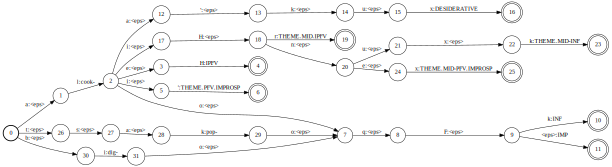

In [9]:
translateFST.draw("translate.gv")
translateFST

Draw the FST transitions for the morphological decomposition graph

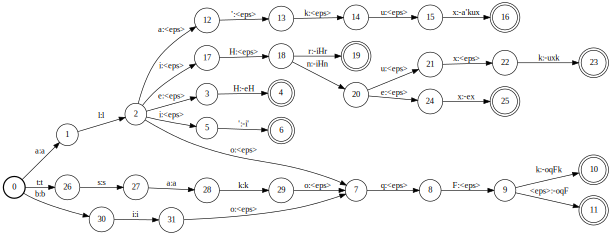

In [10]:
morphFST.draw("morph.gv")
morphFST

Step 8: Generate PDF and download first file.

(This works for Google Chrome. Read here:
https://stackoverflow.com/questions/48774285/how-to-download-file-created-in-colaboratory-workspace ). If you are working from a different browser, you can still download the file by clicking on the folder icon from Google Colab (left panel, fourth button from the top down).

In [11]:
render('dot','pdf','translate.gv')
files.download('translate.gv.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Generate PDF and download second file.


In [12]:
render('dot','pdf','morph.gv')
files.download('morph.gv.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>